Contorno Area 1:12300.0
Contorno Perimetro 1:464.0
Contorno Area 2:6456.0
Contorno Perimetro 2:332.7005695104599
Contorno Area 3:6983.5
Contorno Perimetro 3:399.60511922836304
Contorno Area 4:12210.0
Contorno Perimetro 4:442.0
Contorno Area 5:9574.5
Contorno Perimetro 5:365.60512030124664
Contorno Area 6:0.0
Contorno Perimetro 6:10.828427076339722


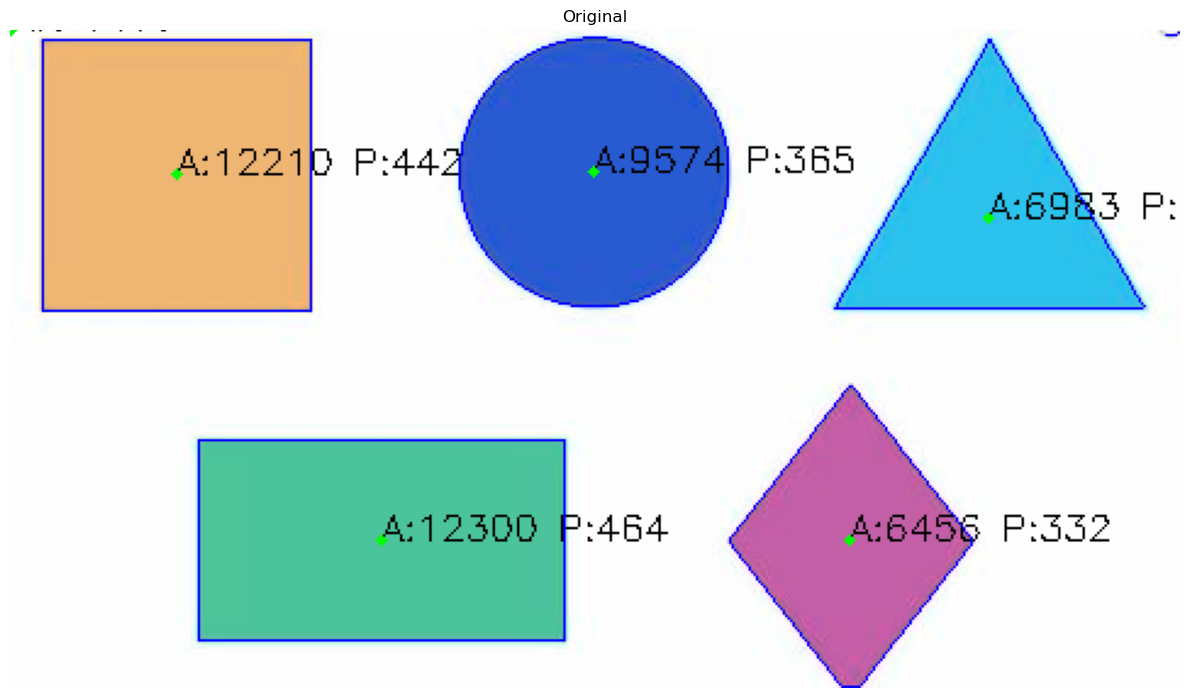

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('..//img/shavi.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBini, umbrall = cv2.threshold(gris, 200, 250, cv2.THRESH_BINARY_INV)
contornos, tipo = cv2.findContours(umbrall, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
i = 0


for contorno in contornos:
    contar = contorno
    momento = cv2.moments(contar)

    if momento["m00"] != 0:
        cx = int(momento["m10"] / momento["m00"]) 
        cy = int(momento["m01"] / momento["m00"])  
    else:
        cx, cy = 0, 0
    i=i+1
    area = cv2.contourArea(contar)
    print(f"Contorno Area {i}:" + str(area))
    perimetro = cv2.arcLength(contar, True)
    print(f"Contorno Perimetro {i}:" + str(perimetro))

    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    position = (cx, cy)
    fontColor = (0, 0, 0)

    cv2.putText(
        img_rgb, f"A:" + str(int(area)) + f" P:" + str(int(perimetro)), position, font, fontScale, fontColor
    )
    
    cv2.circle(img_rgb, (cx, cy), 2, (0, 255, 0), -1)

    cv2.drawContours(img_rgb, [contar], -1, (255,0,0), 1)




plt.figure(figsize=(12, 9))

plt.subplot(1, 1, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)) 
plt.axis('off')



plt.tight_layout()
plt.show()


